In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cols = ['area', 'perimeter', 'compactness', 'lenght', 'width', 'asymmetry', 'groove', 'class']
df = pd.read_csv('data/seeds_dataset.csv', names=cols, sep=';')
df.head()

,area,perimeter,compactness,lenght,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


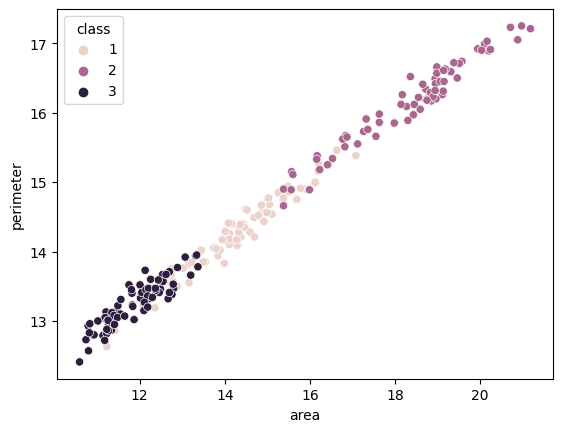

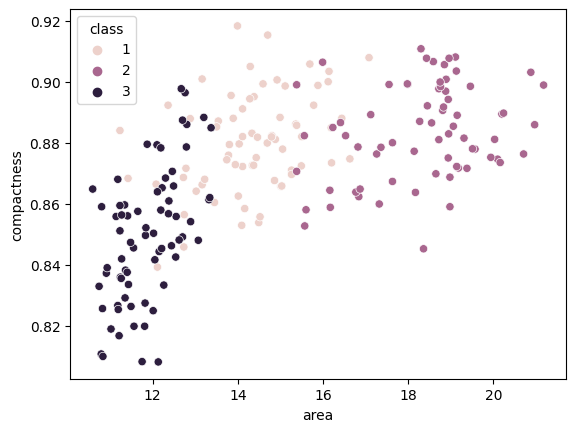

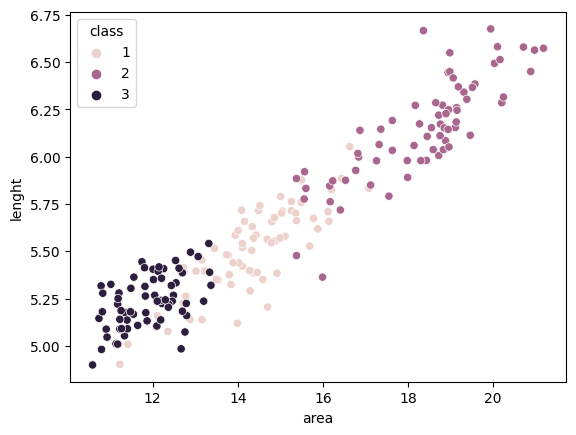

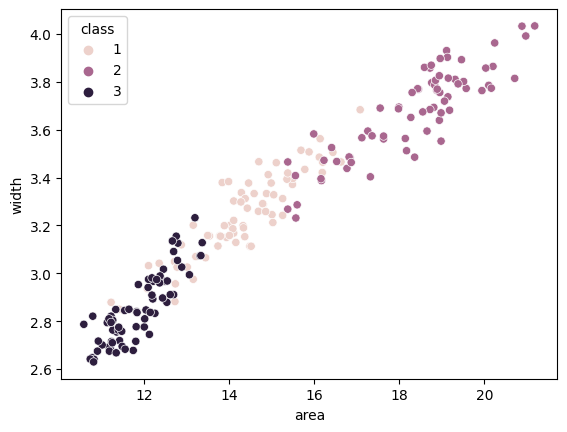

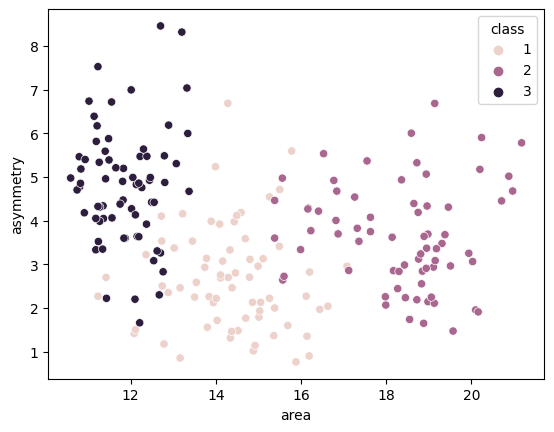

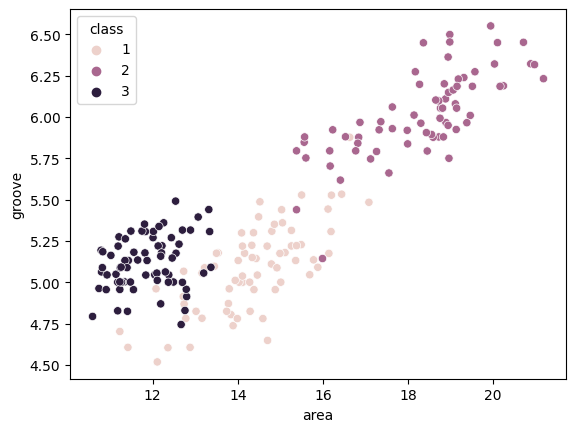

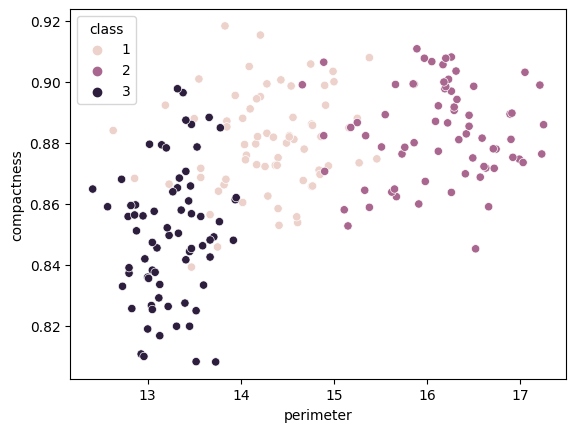

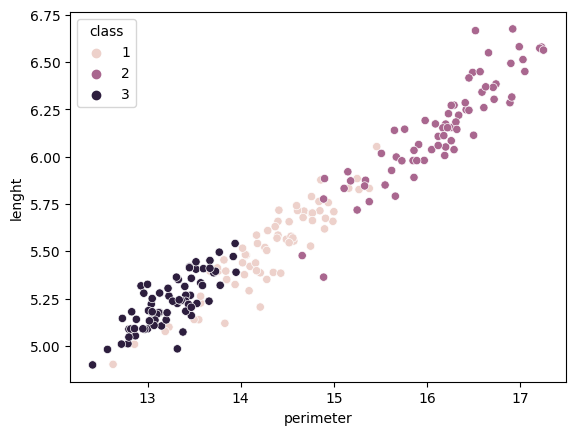

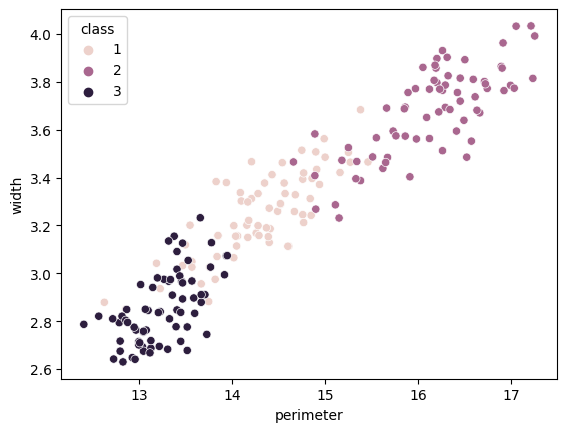

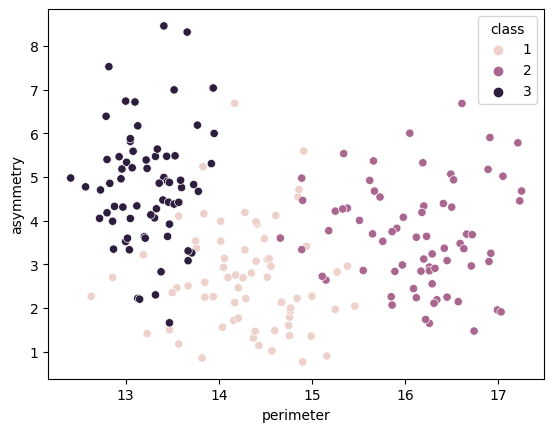

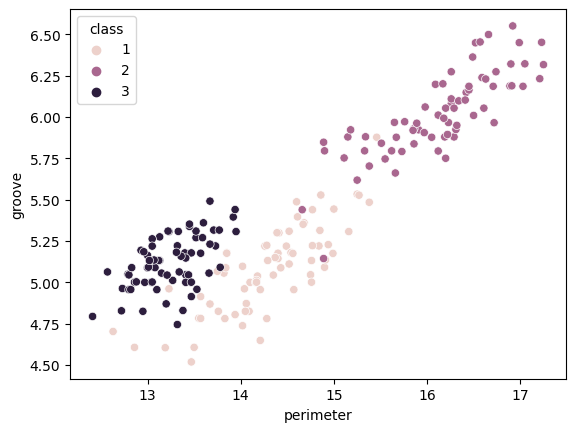

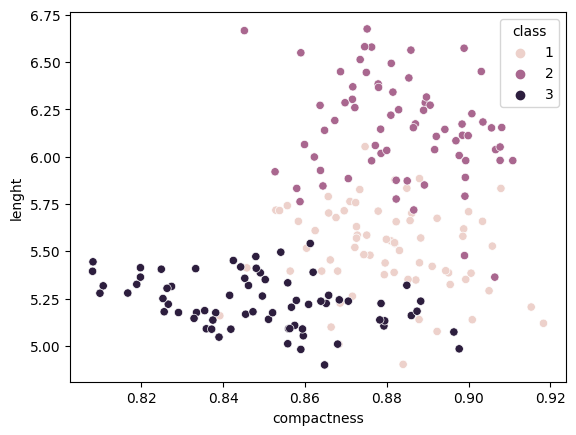

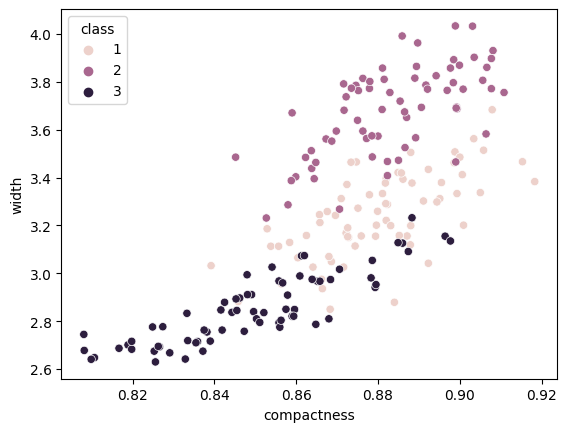

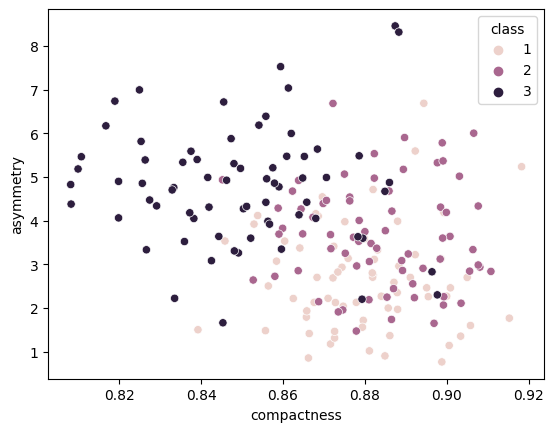

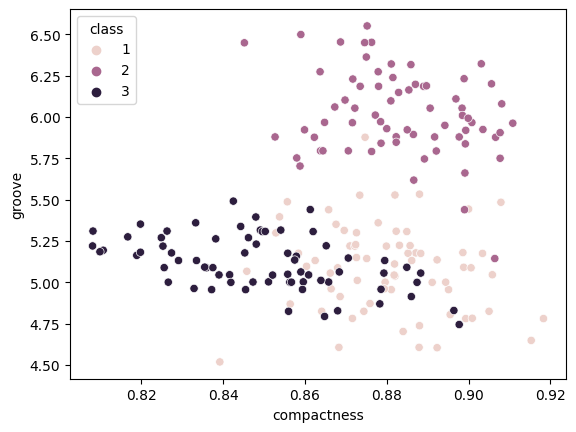

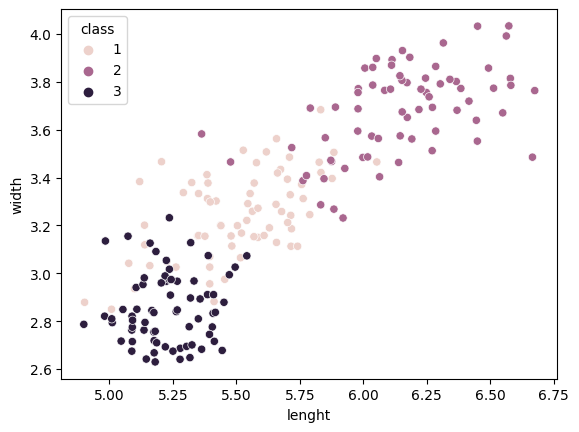

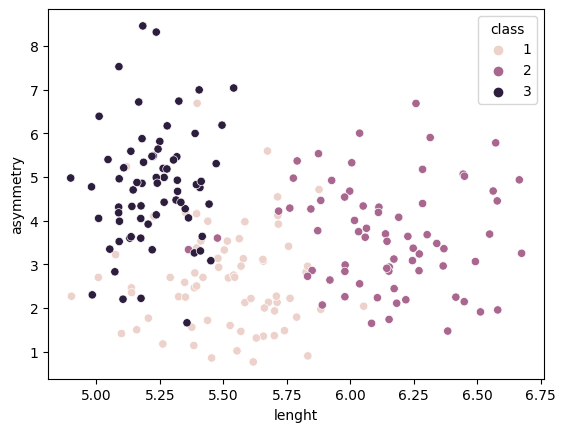

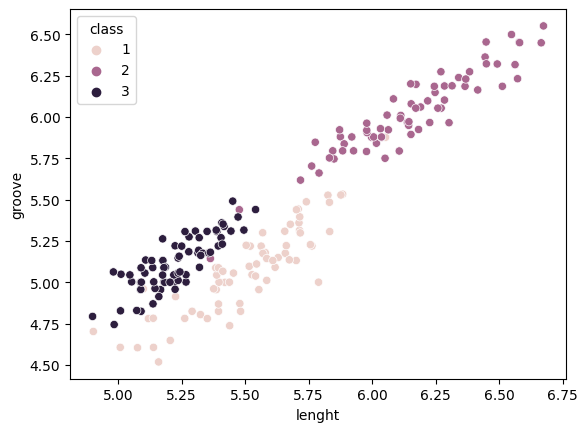

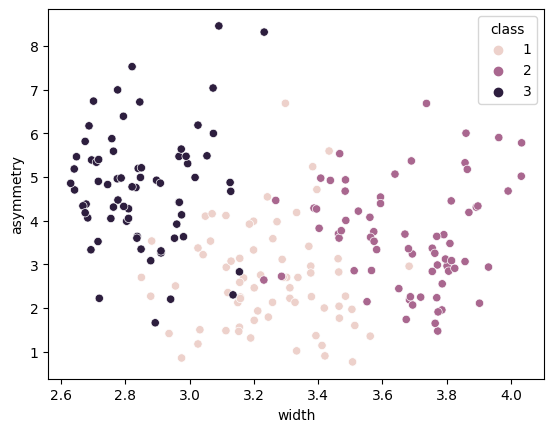

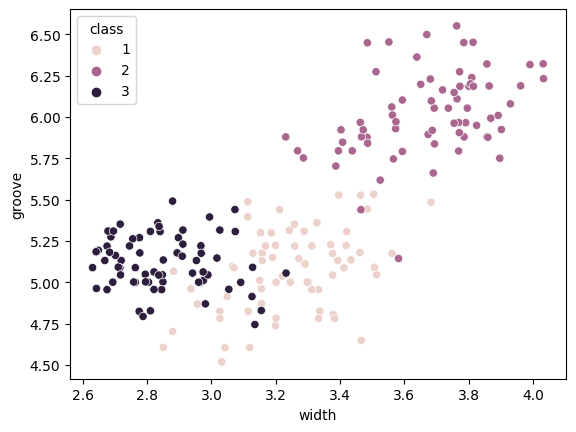

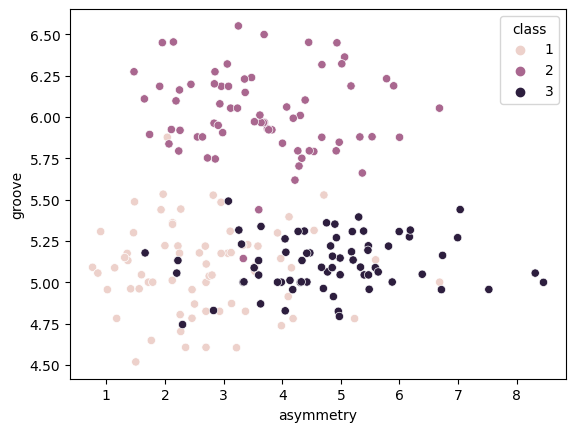

In [8]:
for i in range(len(df.columns)-1):
    for j in range(i+1, len(df.columns)-1):
        x_label = df.columns[i]
        y_label = df.columns[j]
        sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
        plt.show()

## Clustering

In [14]:
from sklearn.cluster import KMeans

In [56]:
x = 'perimeter'
y = 'asymmetry'
X = df[[x, y]].values

In [57]:
kmeans = KMeans(n_clusters=3, n_init='auto').fit(X)

In [58]:
clusters = kmeans.labels_

In [59]:
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [65]:
for i in range(len(clusters)):
    if clusters[i] == 2:
        clusters[i] = 3
    elif clusters[i] == 3:
        clusters[i] = 2

clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 3, 1, 2, 1, 1, 2, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3])

In [66]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, 'class'])

[]

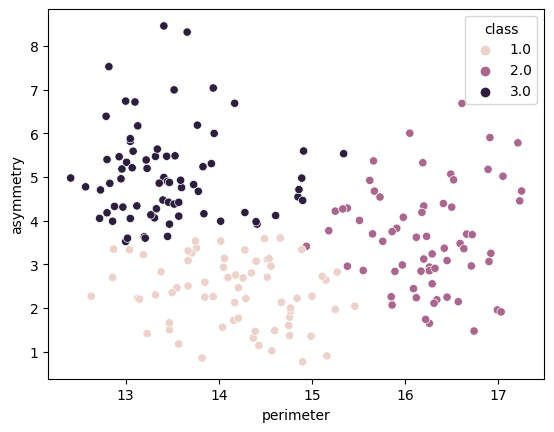

In [67]:
# K Means classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

[]

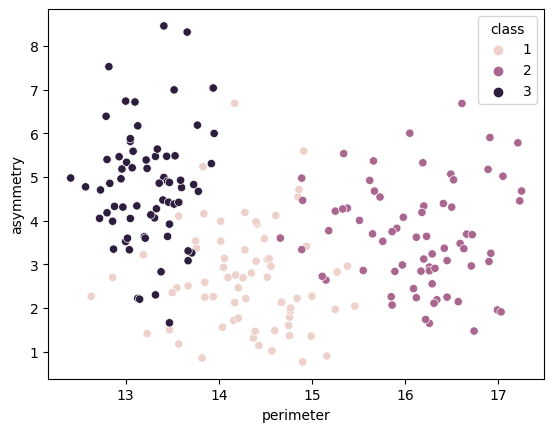

In [68]:
# Original classes
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

## Higher Dimensions

In [107]:
X = df[df.columns[:-1]].values

In [108]:
kmeans = KMeans(n_clusters = 3, n_init='auto').fit(X)
clusters = kmeans.labels_

cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=df.columns)

[]

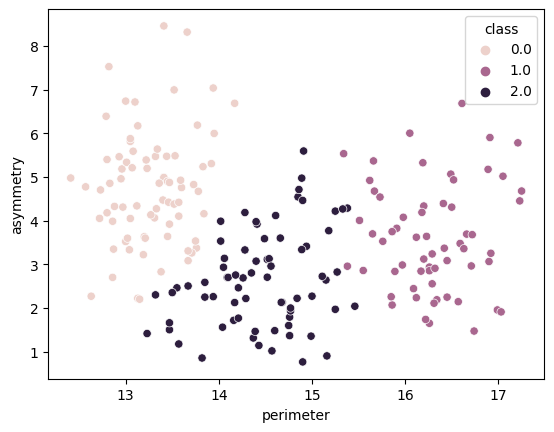

In [109]:
# K Means classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()